Step 1: Setup and Libraries

In [ ]:
# Install necessary libraries
!pip install kaggle nltk spacy scikit-learn pandas matplotlib seaborn


!python -m spacy download en_core_web_sm


# Import libraries
import pandas as pd
import numpy as np
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Download stopwords for NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 14.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Step 2: Data Collection

In [ ]:
# Install necessary libraries
!pip install kaggle nltk spacy scikit-learn pandas matplotlib seaborn
!python -m spacy download en_core_web_sm

# Upload Kaggle API key for one-time setup
import json
import os
from google.colab import files

files.upload()  # Upload kaggle.json file here

# Create a directory for Kaggle API and move the kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the "Reviews for Classification" dataset from Kaggle
!kaggle datasets download -d yanmaksi/reviews-data-for-classification-model --force

# Unzip and load the dataset
import zipfile
import pandas as pd

with zipfile.ZipFile('reviews-data-for-classification-model.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Confirm the exact filename after extraction
print("Files in 'data' directory:", os.listdir('data'))

# Load the dataset into a DataFrame
data = pd.read_csv('data/reviews_for_classification.csv')  # Adjust if the file name is different

# Display the first few rows of the dataset
print("Displaying the first 21966 rows:")
display(data.head(21966))

# Display basic information about the dataset
print("\nDataset Information:")
data.info()

# Check for null values
print("\nChecking for missing values:")
print(data.isnull().sum())


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 25.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Saving kaggle.json to kaggle (2).json
Dataset URL: https://www.kaggle.com/datasets/yanmaksi/reviews-data-for-classification-model
License(s): ODbL-1.0
  0% 0.00/2.08M [00:00<?, ?B/s]
100% 2.08M/2.08M [00:00<00:00, 40.1MB/s]
Files in 'data' directory: ['reviews_for_classification.csv']
Displaying the first 21966 rows:


,name,country,date_time,stars,review_head,review_body
0,xxx xxx,GB,"Updated Apr 4, 2022",5,The best in all that matters,The best in all that matters! It's a great pla...
1,Javier Setovich,US,"Mar 8, 2022",5,Celsius Network ROCKS!,If you are looking for the best #HomeForCrypto...
2,Andrei Franco,VN,"Mar 23, 2022",1,I despise it so much,I despise it so much. Transferring to other wa...
3,Isai Garcia,US,"Feb 23, 2022",1,Worst customer service and worst…,Worst customer service and worst company to de...
4,Tyler McMurray,US,"Mar 22, 2022",5,Celsius is the BEST in Crypto,Celsius is the most transparent and responsive...
...,...,...,...,...,...,...
21961,Ujjval,US,"Dec 12, 2019",1,Worst service ever,Worst service ever. I was emailed to contact t...
21962,Corey,US,"Oct 15, 2019",5,Best banking service I ever had!,NaN
21963,Pat,US,"Sep 25, 2019",5,Preferred bank for over 25+ year,PNC has been my banking partner for over 25+ y...
21964,Robin,US,"Feb 13, 2019",5,My only most trusted bank in 11 years,"My only most trusted bank in 11 years, please ..."



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21966 entries, 0 to 21965
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         21962 non-null  object
 1   country      21965 non-null  object
 2   date_time    21966 non-null  object
 3   stars        21966 non-null  int64 
 4   review_head  21964 non-null  object
 5   review_body  18586 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB

Checking for missing values:
name              4
country           1
date_time         0
stars             0
review_head       2
review_body    3380
dtype: int64


3.Data Pre-Processing

In [ ]:
data['review_body'] = data['review_body'].fillna('').astype(str)
import nltk
import re
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download the necessary NLTK resource
nltk.download('punkt')

# Preprocessing function
def preprocess_text(text):
    if isinstance(text, float):  # Check if the text is not a string
        text = str(text)
    text = text.lower()  # Lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Convert all entries in the 'review_body' column to strings
data['review_body'] = data['review_body'].astype(str)

# Apply preprocessing
data['cleaned_text'] = data['review_body'].apply(preprocess_text)

# Display a sample of the cleaned data
display(data.head(2000))  # Adjust number of rows as needed

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,name,country,date_time,stars,review_head,review_body,cleaned_text
0,xxx xxx,GB,"Updated Apr 4, 2022",5,The best in all that matters,The best in all that matters! It's a great pla...,best matters great platform easy simple use be...
1,Javier Setovich,US,"Mar 8, 2022",5,Celsius Network ROCKS!,If you are looking for the best #HomeForCrypto...,looking best homeforcrypto earn steady yield b...
2,Andrei Franco,VN,"Mar 23, 2022",1,I despise it so much,I despise it so much. Transferring to other wa...,despise much transferring wallets difficult es...
3,Isai Garcia,US,"Feb 23, 2022",1,Worst customer service and worst…,Worst customer service and worst company to de...,worst customer service worst company deal dont...
4,Tyler McMurray,US,"Mar 22, 2022",5,Celsius is the BEST in Crypto,Celsius is the most transparent and responsive...,celsius transparent responsive company ive see...
...,...,...,...,...,...,...,...
1995,Vitaly,US,"Dec 9, 2022",5,Fast and reliable service. Support of Ukrainia...,Fast and reliable service. Support of Ukrainia...,fast reliable service support ukrainian people...
1996,Lisa Melo,US,"Dec 9, 2022",3,IBAN,The bank account number provided from Brazil c...,bank account number provided brazil continued ...
1997,Sai Nikhil,IN,"Dec 9, 2022",5,Smooth and Easy transfer,Smooth and Easy transfer. I personally don't t...,smooth easy transfer personally dont think ser...
1998,Sammy,IE,"Updated Dec 9, 2022",1,Horrible experience find another way but not w...,Horrible experience I sent money to my sister ...,horrible experience sent money sister rd today...


4.Sentiment Analysis using

In [ ]:
# Step 1: Inspect and Fix Column Name
print("Columns in the dataset:", data.columns)

# If the sentiment column does not exist, create it manually (example heuristic-based labeling)
if 'sentiment' not in data.columns:
    print("Sentiment column not found. Adding a dummy sentiment column.")
    data['sentiment'] = data['review_body'].apply(lambda x:
                                                  'positive' if 'good' in x.lower() else
                                                  'negative' if 'bad' in x.lower() else
                                                  'neutral')

# Display a sample of reviews with their sentiment labels
print("\nSample Records with Sentiment Labels:")
display(data[['review_body', 'sentiment']].head(10000))  # Show first 10 records

# Step 4: Label Encoding
from sklearn.preprocessing import LabelEncoder

# Encode sentiment labels
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])


# Step 5: Data Splitting
from sklearn.model_selection import train_test_split

# Splitting data into features and labels
X = data['cleaned_text']
y = data['sentiment_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Feature Extraction with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into numerical features
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 7: Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = lr_model.predict(X_test_tfidf)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))



Columns in the dataset: Index(['name', 'country', 'date_time', 'stars', 'review_head', 'review_body',
       'cleaned_text'],
      dtype='object')
Sentiment column not found. Adding a dummy sentiment column.

Sample Records with Sentiment Labels:


,review_body,sentiment
0,The best in all that matters! It's a great pla...,positive
1,If you are looking for the best #HomeForCrypto...,positive
2,I despise it so much. Transferring to other wa...,neutral
3,Worst customer service and worst company to de...,neutral
4,Celsius is the most transparent and responsive...,neutral
...,...,...
9995,Transferring money to distant relatives has ne...,neutral
9996,I have found out that this is the best way to ...,neutral
9997,"It is a quick process. However, I must commen...",neutral
9998,I like that I can go into my history and resen...,neutral


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.47      0.64        64
           1       0.98      1.00      0.99      3994
           2       1.00      0.83      0.91       336

    accuracy                           0.98      4394
   macro avg       0.99      0.77      0.84      4394
weighted avg       0.98      0.98      0.98      4394



With different machine learning approaches

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Columns in the dataset: Index(['name', 'country', 'date_time', 'stars', 'review_head', 'review_body',
       'cleaned_text', 'sentiment', 'sentiment_encoded'],
      dtype='object')
Training Logistic Regression...
Logistic Regression Accuracy: 0.9793

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        64
           1       0.98      1.00      0.99      3994
           2       1.00      0.83      0.91       336

    accuracy                           0.98      4394
   macro avg       0.99      0.77      0.84      4394
weighted avg       0.98      0.98      0.98      4394

Training SVC...
SVC Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.56      0.72        64
           1       0.98      1.00      0.99      3994
           2       1.00      0.85      0.92       336

    accuracy                           0.98      4394
   macro av

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/c

XGBoost Accuracy: 0.9973

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        64
           1       1.00      1.00      1.00      3994
           2       1.00      0.97      0.98       336

    accuracy                           1.00      4394
   macro avg       1.00      0.98      0.99      4394
weighted avg       1.00      1.00      1.00      4394

Training LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.241307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76770
[LightGBM] [Info] Number of data points in the train set: 17572, number of used features: 1830
[LightGBM] [Info] Start training from score -4.221102
[LightGBM] [Info] Start training from score -0.095595
[LightGBM] [Info] Start training from score -2.570656
[LightGBM] [Warning] No further

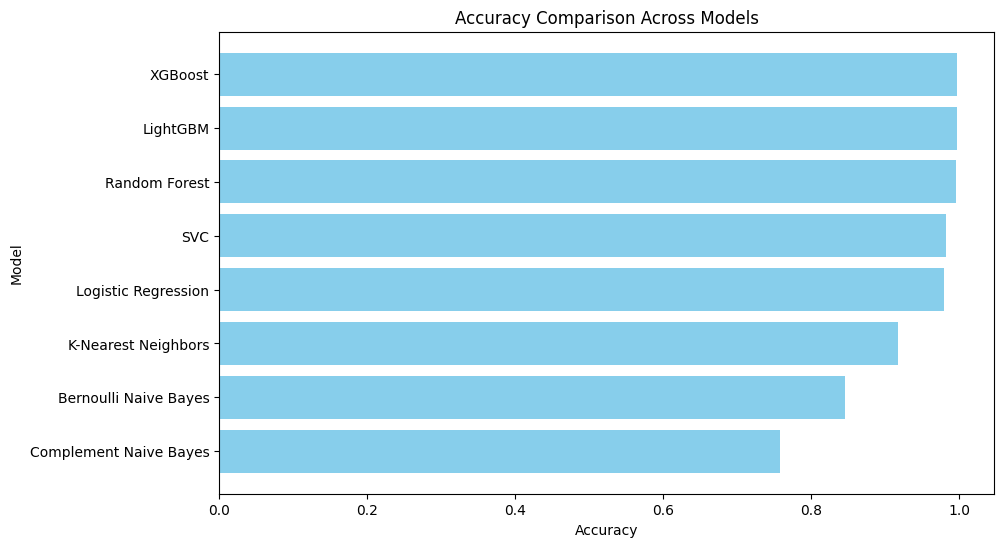

In [ ]:
!pip install scikit-learn
!pip install xgboost
!pip install lightgbm
!pip install catboost
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
# Import BernoulliNB
from sklearn.naive_bayes import BernoulliNB # This line is added to import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
# Step 1: Handle Missing Sentiment Column
print("Columns in the dataset:", data.columns)

# If the sentiment column is missing, create it using heuristics
if 'sentiment' not in data.columns:
    print("Sentiment column not found. Adding a dummy sentiment column.")
    data['sentiment'] = data['review_body'].apply(lambda x:
                                                  'positive' if 'good' in x.lower() else
                                                  'negative' if 'bad' in x.lower() else
                                                  'neutral')

# Step 2: Label Encoding
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Split the data into features and labels
X = data['cleaned_text']
y = data['sentiment_encoded']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Step 3: Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVC": SVC(probability=True),
    "Random Forest": RandomForestClassifier(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Complement Naive Bayes": ComplementNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss", use_label_encoder=False),
    "LightGBM": LGBMClassifier(),

}

# Step 4: Evaluate Models
accuracy_scores = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_tfidf, y_train)  # Train the model
    y_pred = model.predict(X_test_tfidf)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracy_scores[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy:.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Step 5: Compare Accuracy Scores
print("\nModel Accuracy Comparison:")
accuracy_df = pd.DataFrame(list(accuracy_scores.items()), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
print(accuracy_df)

# Optional: Plot Accuracy Comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(accuracy_df['Model'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy Comparison Across Models')
plt.gca().invert_yaxis()
plt.show()


6.Fine tuning with DistilbERT model

In [8]:
# Step 1: Install and Import Necessary Libraries
!pip install transformers datasets torch sklearn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

# Step 2: Prepare Dataset
print("Columns in the dataset:", data.columns)

# Limit the dataset to 1000 records
data = data.sample(n=1000, random_state=42)

# Add sentiment column if missing
if 'sentiment' not in data.columns:
    print("Sentiment column not found. Adding a dummy sentiment column.")
    data['sentiment'] = data['review_body'].apply(lambda x:
                                                  'positive' if 'good' in x.lower() else
                                                  'negative' if 'bad' in x.lower() else
                                                  'neutral')

# Map sentiment to numerical labels
sentiment_mapping = {'positive': 0, 'neutral': 1, 'negative': 2}
data['label'] = data['sentiment'].map(sentiment_mapping)

# Train-test split (80% train, 20% test)
train_data, test_data = train_test_split(data[['cleaned_text', 'label']], test_size=0.2, random_state=42, stratify=data['label'])

# Convert to Hugging Face Dataset
train_dataset = Dataset.from_pandas(train_data)
test_dataset = Dataset.from_pandas(test_data)

# Step 3: Tokenization
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['cleaned_text'], padding="max_length", truncation=True)

train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Remove unnecessary columns
train_dataset = train_dataset.remove_columns(['cleaned_text'])
test_dataset = test_dataset.remove_columns(['cleaned_text'])

# Convert labels to PyTorch tensors
train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])
test_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

# Step 4: Fine-tune DistilBERT (smaller model than BERT)
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)

# Disable wandb logging and use smaller batch size for memory efficiency
training_args = TrainingArguments(
    output_dir="./results",  # Store results in this directory
    evaluation_strategy="epoch",  # Evaluate after each epoch
    save_strategy="epoch",  # Save checkpoints after each epoch
    learning_rate=2e-5,  # Learning rate for the optimizer
    per_device_train_batch_size=8,  # Reduced batch size to save memory
    per_device_eval_batch_size=8,   # Reduced batch size for evaluation
    num_train_epochs=3,  # Number of training epochs
    weight_decay=0.01,  # Weight decay for regularization
    logging_dir="./logs",  # Directory for storing logs
    logging_steps=10,  # Log training metrics every 10 steps
    report_to="none",  # Disable wandb and other logging tools
    fp16=True,  # Enable mixed precision training for faster execution
    gradient_checkpointing=True,  # Save memory by checkpointing gradients
    dataloader_num_workers=2,  # Use workers for data loading
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=lambda p: {
        "accuracy": accuracy_score(p.label_ids, np.argmax(p.predictions, axis=1)),
    },
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

# Step 5: Predictions and Word Count
predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(predictions.predictions, axis=1)
test_data['predicted_sentiment'] = predicted_labels
test_data['predicted_sentiment'] = test_data['predicted_sentiment'].map({0: 'positive', 1: 'neutral', 2: 'negative'})

# Perform Word Count
from collections import Counter
import re

def count_words_by_sentiment(data, sentiment):
    reviews = data[data['predicted_sentiment'] == sentiment]['cleaned_text']
    all_words = " ".join(reviews).lower()
    words = re.findall(r'\b\w+\b', all_words)  # Extract words using regex
    return Counter(words)

positive_word_count = count_words_by_sentiment(test_data, 'positive')
neutral_word_count = count_words_by_sentiment(test_data, 'neutral')
negative_word_count = count_words_by_sentiment(test_data, 'negative')

# Display Top 10 Words for Each Sentiment
print("\nTop 10 Words in Positive Sentiment:")
print(positive_word_count.most_common(10))

print("\nTop 10 Words in Neutral Sentiment:")
print(neutral_word_count.most_common(10))

print("\nTop 10 Words in Negative Sentiment:")
print(negative_word_count.most_common(10))

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Columns in the dataset: Index(['name', 'country', 'date_time', 'stars', 'review_head', 'review_body',
       'cleaned_text', 'sentiment', 'sentiment_encoded'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-8-60d0306bf3ce>:75: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,0.245400,0.410933,0.890000
2,0.065100,0.113944,0.985000


Epoch,Training Loss,Validation Loss,Accuracy
1,0.245400,0.410933,0.890000
2,0.065100,0.113944,0.985000
3,0.082700,0.096690,0.985000


Evaluation Results: {'eval_loss': 0.09669031947851181, 'eval_accuracy': 0.985, 'eval_runtime': 182.947, 'eval_samples_per_second': 1.093, 'eval_steps_per_second': 0.137, 'epoch': 3.0}

Top 10 Words in Positive Sentiment:
[('good', 21), ('account', 10), ('would', 9), ('money', 6), ('service', 6), ('sofi', 5), ('bank', 4), ('pay', 4), ('closing', 4), ('loan', 4)]

Top 10 Words in Neutral Sentiment:
[('account', 62), ('money', 60), ('chime', 45), ('bank', 43), ('service', 41), ('get', 36), ('card', 35), ('customer', 31), ('great', 29), ('use', 27)]

Top 10 Words in Negative Sentiment:
[]


word cloud and mostly used words

Detecting error related to technical problems and gving some feedback to developer

In [3]:
# Install necessary libraries
!pip install kaggle nltk spacy scikit-learn pandas matplotlib seaborn
!python -m spacy download en_core_web_sm


# Import libraries
import pandas as pd
import numpy as np
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# Download stopwords for NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")
# Install necessary libraries
!pip install kaggle nltk spacy scikit-learn pandas matplotlib seaborn
!python -m spacy download en_core_web_sm

# Upload Kaggle API key for one-time setup
import json
import os
from google.colab import files

files.upload()  # Upload kaggle.json file here

# Create a directory for Kaggle API and move the kaggle.json file there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the "Reviews for Classification" dataset from Kaggle
!kaggle datasets download -d yanmaksi/reviews-data-for-classification-model --force

# Unzip and load the dataset
import zipfile
import pandas as pd

with zipfile.ZipFile('reviews-data-for-classification-model.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

# Confirm the exact filename after extraction
print("Files in 'data' directory:", os.listdir('data'))

# Load the dataset into a DataFrame
data = pd.read_csv('data/reviews_for_classification.csv')  # Adjust if the file name is different

# Install necessary libraries
!pip install pandas seaborn scikit-learn

# Import required libraries
import pandas as pd
from collections import Counter

# Step 1: Load Dataset
# Assuming the dataset file is in the 'data' folder
file_path = 'data/reviews_for_classification.csv'

# Load the dataset into a DataFrame
data = pd.read_csv(file_path)

# Verify dataset size
print(f"Dataset size: {data.shape[0]} records")

# Step 2: Take a Sample of the Dataset
# Take a sample of 26,966 records or fewer if the dataset is smaller
sample_size = min(26966, data.shape[0])  # Use the smaller of 26,966 or actual dataset size
data_sample = data.sample(sample_size, replace=False)

print(f"Sampled {data_sample.shape[0]} records")

# Step 3: Define Keywords for Categorizing Issues
keywords = {
    "glitch": ["glitch", "bug", "crash", "hang"],
    "UI issues": ["user interface", "UI", "not responding", "worst UI", "difficult to use", "unresponsive"],
    "transaction errors": ["wire transaction", "transaction failed", "payment not working", "technical issues"],
    "404 errors": ["404 error", "page not found", "broken link", "missing page"],
    "other technical issues": ["technical issue", "not working", "failure", "slow", "lag",
                               "incompatibility", "timeout", "unexpected behavior", "performance issue",
                               "does not function", "system error"],
    "other errors": ["error", "issue", "problem", "does not work"]
}

# Step 4: Categorize Reviews by Keywords
def categorize_review(review):
    """Categorize a review based on keywords."""
    review = str(review).lower()
    for category, terms in keywords.items():
        if any(term in review for term in terms):
            return category
    return "uncategorized"

# Apply categorization to the sampled data
data_sample['issue_category'] = data_sample['review_body'].apply(categorize_review)

# Step 5: Count and Display Issues by Category
issue_counts = Counter(data_sample['issue_category'])
print("\nIssue Counts by Category:")
for category, count in issue_counts.items():
    print(f"{category}: {count}")

# Step 6: Define Suggested Solutions for Developers
solutions = {
    "glitch": "Ensure thorough testing is performed, including stress and edge-case testing. "
              "Consider implementing robust error-handling mechanisms and fixing any known bugs.",
    "UI issues": "Improve the UI design by conducting usability testing. Focus on responsiveness "
                 "and intuitive navigation. Regularly solicit feedback from users to refine the interface.",
    "transaction errors": "Investigate and address the backend logic for handling transactions. Ensure the "
                          "payment gateways are stable and provide detailed error logs for debugging.",
    "404 errors": "Audit the website or application for broken links. Implement proper 404 error pages to guide users "
                  "and consider automated monitoring for future issues.",
    "other technical issues": "Conduct a thorough review of system logs to identify patterns in errors. Ensure "
                              "compatibility across platforms and devices. Optimize code for better performance "
                              "and implement proper timeout handling for requests.",
    "other errors": "Create a centralized logging system to track and resolve miscellaneous errors. Analyze trends in "
                    "error reports to identify recurring patterns and address them systematically.",
    "uncategorized": "Review uncategorized feedback manually to identify any overlooked patterns or categories."
}

# Display Suggested Solutions
print("\nSuggested Solutions for Developers:")
for category, solution in solutions.items():
    print(f"\n{category}:\n{solution}")

# Step 7: Display Examples for Each Category
print("\nExamples of Reviews by Category:")
for category in keywords.keys():
    examples = data_sample[data_sample['issue_category'] == category]['review_body'].head(3).tolist()
    print(f"\n{category} (Top Examples):")
    for example in examples:
        print(f"- {example}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 50.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.7.1/en_core_web_sm-3.7.1-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Saving kaggle.json to kaggle (1).json
Dataset URL: https://www.kaggle.com/datasets/yanmaksi/reviews-data-for-classification-model
License(s): ODbL-1.0
  0% 0.00/2.08M [00:00<?, ?B/s]
100% 2.08M/2.08M [00:00<00:00, 120MB/s]
Files in 'data' directory: ['reviews_for_classification.csv']
Dataset size: 21966 records
Sampled 21966 records

Issue Counts by Category:
uncategorized: 18673
other technical issues: 233
other errors: 2054
glitch: 957
UI issues: 36
transaction errors: 13

Suggested Solutions for Developers:

glitch:
Ensure thorough testing is performed, including stress and edge-case testing. Consider implementing robust error-handling mechanisms and fixing any known bugs.

UI issues:
Improve the UI design by conducting usability testing. Focus on responsiveness and intuitive navigation. Regularly solicit feedback from users to refine the interface.

transaction errors:
Investigate and address the backend logic for handling transactions. Ensure the payment gateways are stable and pr

Chatbot

In [5]:
# Install necessary libraries
!pip install pandas ipywidgets

# Import libraries
import pandas as pd
from collections import Counter

# Initialize an empty list to store developer requests
developer_requests = []

# Define keywords for issue categorization
keywords = {
    "glitch": ["glitch", "bug", "crash", "hang"],
    "UI issues": ["user interface", "UI", "not responding", "worst UI", "difficult to use", "unresponsive"],
    "transaction errors": ["wire transaction", "transaction failed", "payment not working", "technical issues"],
    "404 errors": ["404 error", "page not found", "broken link", "missing page"],
    "other technical issues": ["technical issue", "not working", "failure", "slow", "lag",
                               "incompatibility", "timeout", "unexpected behavior", "performance issue",
                               "does not function", "system error"],
    "other errors": ["error", "issue", "problem", "does not work"]
}

# Define solutions for each category
solutions = {
    "glitch": "Ensure thorough testing is performed, including stress and edge-case testing. "
              "Consider implementing robust error-handling mechanisms and fixing any known bugs.",
    "UI issues": "Improve the UI design by conducting usability testing. Focus on responsiveness "
                 "and intuitive navigation. Regularly solicit feedback from users to refine the interface.",
    "transaction errors": "Investigate and address the backend logic for handling transactions. Ensure the "
                          "payment gateways are stable and provide detailed error logs for debugging.",
    "404 errors": "Audit the website or application for broken links. Implement proper 404 error pages to guide users "
                  "and consider automated monitoring for future issues.",
    "other technical issues": "Conduct a thorough review of system logs to identify patterns in errors. Ensure "
                              "compatibility across platforms and devices. Optimize code for better performance "
                              "and implement proper timeout handling for requests.",
    "other errors": "Create a centralized logging system to track and resolve miscellaneous errors. Analyze trends in "
                    "error reports to identify recurring patterns and address them systematically.",
    "uncategorized": "Review uncategorized feedback manually to identify any overlooked patterns or categories."
}

# Function to categorize review text
def categorize_review(review):
    """Categorize a review based on keywords."""
    review = str(review).lower()
    for category, terms in keywords.items():
        if any(term in review for term in terms):
            return category
    return "uncategorized"

# Chatbot function with developer request feature
def chatbot():
    print("Welcome to the Support Issue Chatbot!")
    print("Type 'exit' to end the conversation.")
    print("\nDescribe your issue, and I will categorize it and suggest solutions.")
    print("If you would like to submit this issue to developers, just let me know!\n")

    while True:
        # User input
        user_input = input("You: ")
        if user_input.lower() == "exit":
            print("\nChatbot: Thank you for using the Support Issue Chatbot. Have a great day!")
            break

        # Categorize the input
        category = categorize_review(user_input)
        solution = solutions.get(category, "Sorry, I couldn't find a solution for this issue.")

        # Chatbot response
        print(f"\nChatbot: Your issue falls under the category: {category}")
        print(f"Chatbot: Suggested Solution: {solution}\n")

        # Ask if the user wants to submit the issue to developers
        request_submission = input("Chatbot: Would you like to submit this issue to the developers? (yes/no): ").strip().lower()
        if request_submission == "yes":
            # Save the request
            developer_requests.append({"issue": user_input, "category": category, "solution": solution})
            print("Chatbot: Your issue has been submitted to the developers.\n")
        elif request_submission == "no":
            print("Chatbot: No problem! Let me know if you have another issue.\n")
        else:
            print("Chatbot: I didn't understand that. Let's continue.\n")

# Export developer requests to a CSV
def export_requests():
    if developer_requests:
        df = pd.DataFrame(developer_requests)
        file_name = "developer_requests.csv"
        df.to_csv(file_name, index=False)
        print(f"\nChatbot: All developer requests have been saved to {file_name}.")
    else:
        print("\nChatbot: No developer requests to save.")

# Start the chatbot
chatbot()

# After exiting the chatbot, export requests
export_requests()

Welcome to the Support Issue Chatbot!
Type 'exit' to end the conversation.

Describe your issue, and I will categorize it and suggest solutions.
If you would like to submit this issue to developers, just let me know!

You: captcha is wrong

Chatbot: Your issue falls under the category: uncategorized
Chatbot: Suggested Solution: Review uncategorized feedback manually to identify any overlooked patterns or categories.

Chatbot: Would you like to submit this issue to the developers? (yes/no): no
Chatbot: No problem! Let me know if you have another issue.

You: exit

Chatbot: Thank you for using the Support Issue Chatbot. Have a great day!

Chatbot: No developer requests to save.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


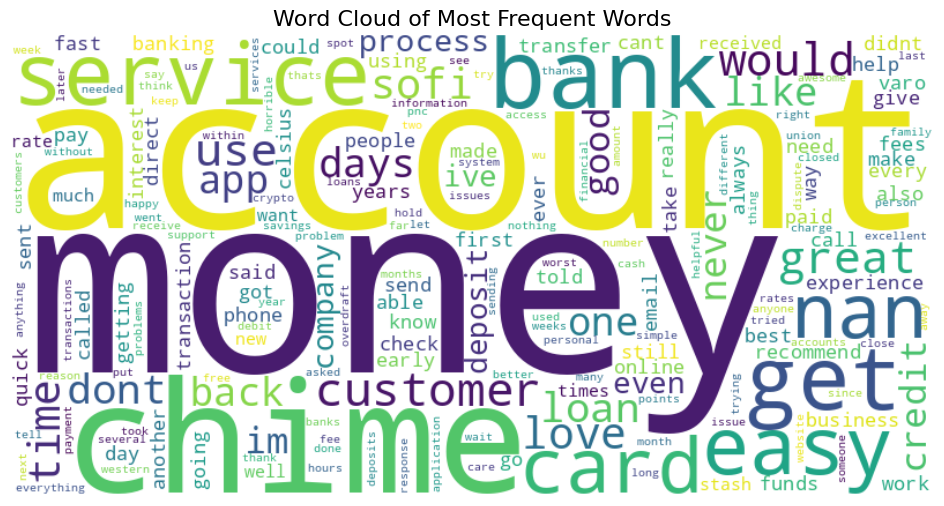

<ipython-input-4-b385b78f19de>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=word_df, palette='coolwarm')


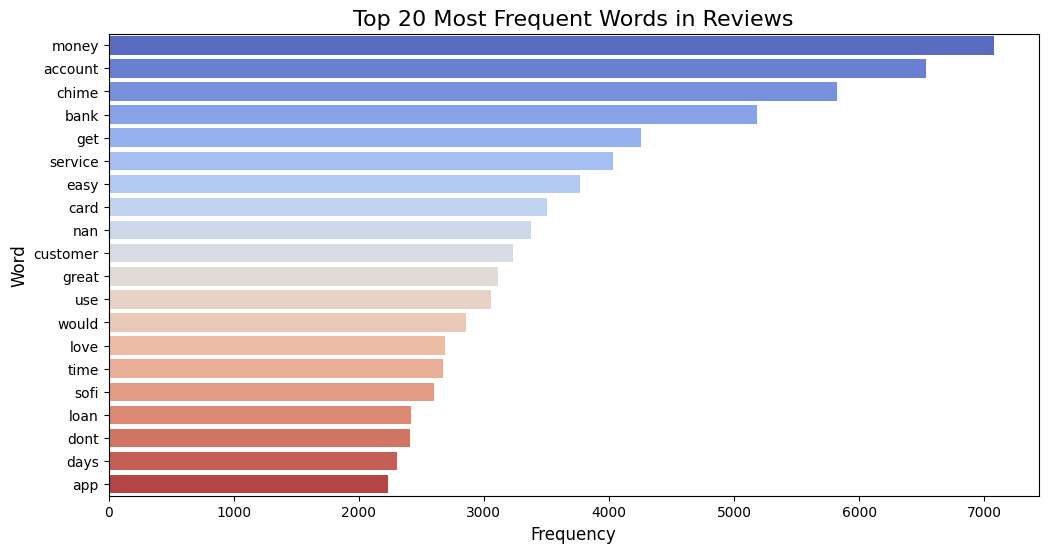

In [4]:
# Install necessary libraries
!pip install wordcloud matplotlib seaborn nltk

# Import libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import re

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

# Data is already loaded in `data` with 26,966 records

# Ensure the data contains the required column
if 'review_body' not in data.columns:
    print("The column 'review_body' does not exist in the dataset!")
else:
    # Preprocess text: cleaning and tokenization
    def preprocess_text(text):
        """Clean and tokenize text."""
        text = str(text).lower()  # Convert to lowercase
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
        tokens = nltk.word_tokenize(text)  # Tokenize
        tokens = [word for word in tokens if word not in nltk.corpus.stopwords.words('english')]  # Remove stopwords
        return tokens

    # Combine all reviews into a single list of words
    all_words = []
    for review in data['review_body']:
        all_words.extend(preprocess_text(review))

    # Count word frequencies
    word_counts = Counter(all_words)

    # Get the 20 most common words
    most_common_words = word_counts.most_common(20)

    # Convert to DataFrame for plotting
    word_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

    # Generate Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

    # Plot Word Cloud
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Most Frequent Words", fontsize=16)
    plt.show()

    # Plot Bar Graph of Most Frequent Words
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Frequency', y='Word', data=word_df, palette='coolwarm')
    plt.title("Top 20 Most Frequent Words in Reviews", fontsize=16)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Word", fontsize=12)
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


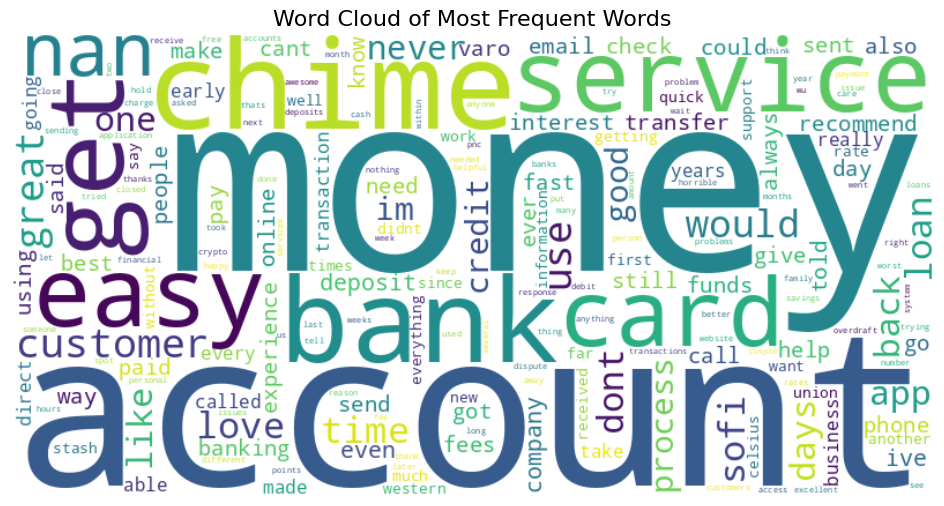

<ipython-input-5-938443f7d22f>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Word Count', data=sentiment_data, palette='coolwarm')


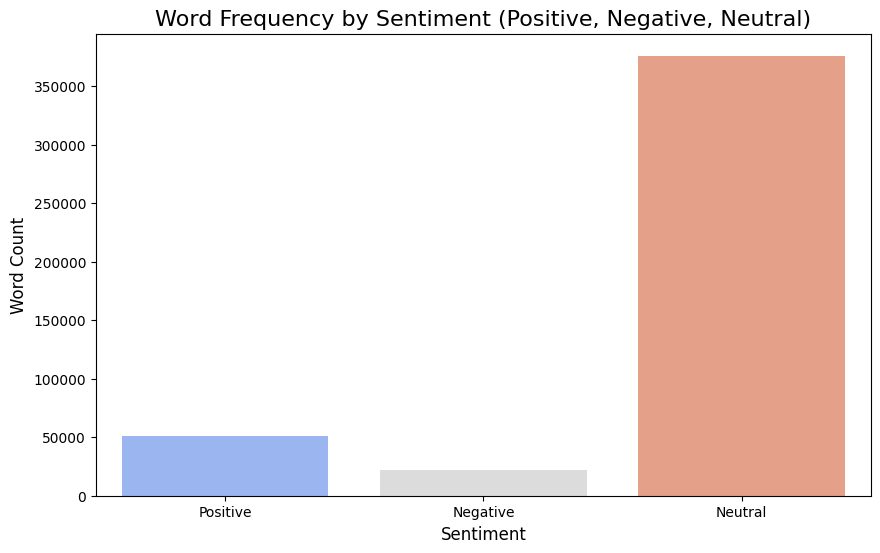

Most Frequent Positive Words: ['best', 'great', 'easy', 'number', 'like', 'recommend', 'good', 'better', 'well', 'engaged']
Most Frequent Negative Words: ['pay', 'despise', 'difficult', 'worst', 'waste', 'clueless', 'leave', 'miss', 'problems', 'suspended']
Most Frequent Neutral Words: ['matters', 'platform', 'simple', 'use', 'beginnerfriendly', 'one', 'crypto', 'offers', 'actually', 'call']


In [5]:
# Install necessary libraries
!pip install wordcloud matplotlib seaborn nltk

# Import libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
import re
import pandas as pd

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Sentiment lexicon setup (using VADER lexicon for simplicity)
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Data is already loaded in `data` with 26,966 records

# Preprocess text: cleaning and tokenization
def preprocess_text(text):
    """Clean and tokenize text."""
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in nltk.corpus.stopwords.words('english')]  # Remove stopwords
    return tokens

# Combine all reviews into a single list of words
all_words = []
for review in data['review_body']:
    all_words.extend(preprocess_text(review))

# Count word frequencies
word_counts = Counter(all_words)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words", fontsize=16)
plt.show()

# Step 1: Identify positive, negative, and neutral words
positive_words = []
negative_words = []
neutral_words = []

# Categorize each word using VADER Sentiment
for word in word_counts.keys():
    sentiment_score = sia.polarity_scores(word)['compound']
    if sentiment_score > 0.05:
        positive_words.append(word)
    elif sentiment_score < -0.05:
        negative_words.append(word)
    else:
        neutral_words.append(word)

# Step 2: Count the frequency of positive, negative, and neutral words
positive_word_counts = sum(word_counts[word] for word in positive_words)
negative_word_counts = sum(word_counts[word] for word in negative_words)
neutral_word_counts = sum(word_counts[word] for word in neutral_words)

# Step 3: Create a DataFrame for visualization
sentiment_data = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral'],
    'Word Count': [positive_word_counts, negative_word_counts, neutral_word_counts]
})

# Step 4: Plot Bar Graph of Sentiment Word Frequencies
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Word Count', data=sentiment_data, palette='coolwarm')
plt.title("Word Frequency by Sentiment (Positive, Negative, Neutral)", fontsize=16)
plt.ylabel("Word Count", fontsize=12)
plt.xlabel("Sentiment", fontsize=12)
plt.show()

# Optional: Show the most frequent words in each sentiment category
print(f"Most Frequent Positive Words: {positive_words[:10]}")
print(f"Most Frequent Negative Words: {negative_words[:10]}")
print(f"Most Frequent Neutral Words: {neutral_words[:10]}")
